# EAS 503 Final Project Group 2 - NYPD Motor Vehicle Collisions
####  Sai Krishna, Karan ,Tejas

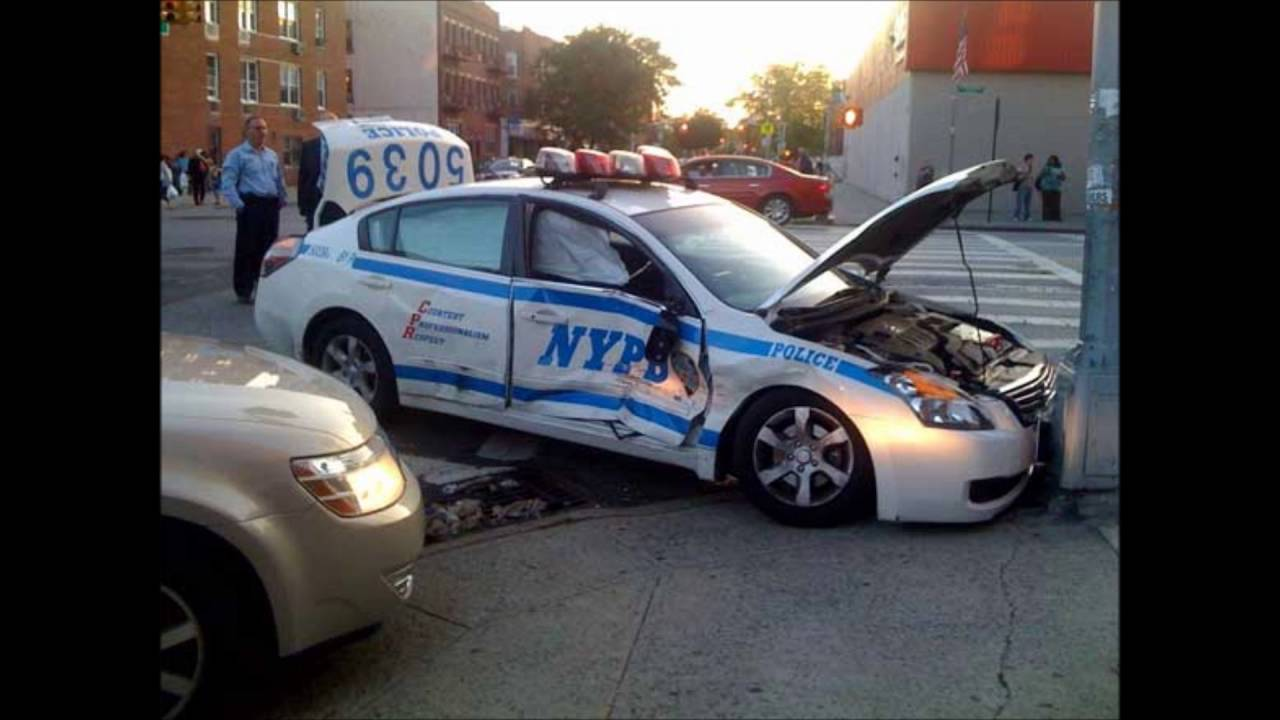

In [120]:
from IPython.display import Image
image = Image(filename='nypd.jpg')
image

#### Importing all required packages 

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
import gmplot
import webbrowser,os
import folium
import pymysql

In [122]:
db = pymysql.connect(host="localhost",    # your host, usually localhost
                     user="root",         # your username
                     passwd="password",       # your password
                     db="Project")

### Data Display

In [123]:
from IPython.display import HTML, display

sql = '''SELECT DATES,TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,ON_STREET_NAME,
NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PERSONS_INJURED,CONTRIBUTING_FACTOR_VEHICLE_1  
FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '' AND 
NUMBER_OF_PERSONS_KILLED <> 0 AND NUMBER_OF_PERSONS_INJURED <> 0 AND CONTRIBUTING_FACTOR_VEHICLE_1 <> 'Unspecified' LIMIT 5'''
cur = db.cursor()
cur.execute(sql)
Date = []
Time = []
Borough = []
Zip_code = []
Latitude = []
Longitude = []
On_Street_Name = []
Number_of_People_Killed = []
Number_of_People_Injured = []
Contributing_Vehicle_1 = []


for row in cur.fetchall():
    Date.append(row[0])
    Time.append(row[1])
    Borough.append(row[2])
    Zip_code.append(row[3])
    Latitude.append(row[4])
    Longitude.append(row[5])
    On_Street_Name.append(row[6])
    Number_of_People_Killed.append(row[7])
    Number_of_People_Injured.append(row[8])
    Contributing_Vehicle_1.append(row[9])
    
data = [['Date','Time','Borough','Zip code','Latitude','Longitude','On Street Name','Number of People Killed','Number of People Injured','Contributing Vehicle 1'],
        [Date[0],Time[0],Borough[0],Zip_code[0],Latitude[0],Longitude[0],On_Street_Name[0],Number_of_People_Killed[0],Number_of_People_Injured[0],Contributing_Vehicle_1[0]],
       [Date[1],Time[1],Borough[1],Zip_code[1],Latitude[1],Longitude[1],On_Street_Name[1],Number_of_People_Killed[1],Number_of_People_Injured[1],Contributing_Vehicle_1[1]],
       [Date[2],Time[2],Borough[2],Zip_code[2],Latitude[2],Longitude[2],On_Street_Name[2],Number_of_People_Killed[2],Number_of_People_Injured[2],Contributing_Vehicle_1[2]],
       [Date[3],Time[3],Borough[3],Zip_code[3],Latitude[3],Longitude[3],On_Street_Name[3],Number_of_People_Killed[3],Number_of_People_Injured[3],Contributing_Vehicle_1[3]],
       [Date[4],Time[4],Borough[4],Zip_code[4],Latitude[4],Longitude[4],On_Street_Name[4],Number_of_People_Killed[4],Number_of_People_Injured[4],Contributing_Vehicle_1[4]]]

display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))

Date,Time,Borough,Zip code,Latitude,Longitude,On Street Name,Number of People Killed,Number of People Injured,Contributing Vehicle 1
2013-01-20,2:00:00,MANHATTAN,10010,40.7407,-73.9818,EAST 26 STREET,1,1,Driver Inattention/Distraction
2013-11-11,12:50:00,MANHATTAN,10029,40.7904,-73.9498,PARK AVENUE,1,3,Failure to Yield Right-of-Way
2013-06-04,8:15:00,MANHATTAN,10025,40.7947,-73.9699,WEST 97 STREET,1,1,Aggressive Driving/Road Rage
2014-01-10,20:48:00,MANHATTAN,10025,40.7959,-73.9727,WEST 97 STREET,1,1,Failure to Yield Right-of-Way
2013-02-06,14:15:00,MANHATTAN,10031,40.8201,-73.9551,WEST 135 STREET,1,6,Failure to Yield Right-of-Way


##    Scatter Plot of Collisions

In [124]:
querystr = "SELECT LATITUDE, LONGITUDE FROM ACCIDENT_DATA;"
cur = db.cursor()
cur.execute(querystr)

1048573

In [125]:
lat = []
lon = []
for row in cur.fetchall():
    lat.append(row[0])
    lon.append(row[1])

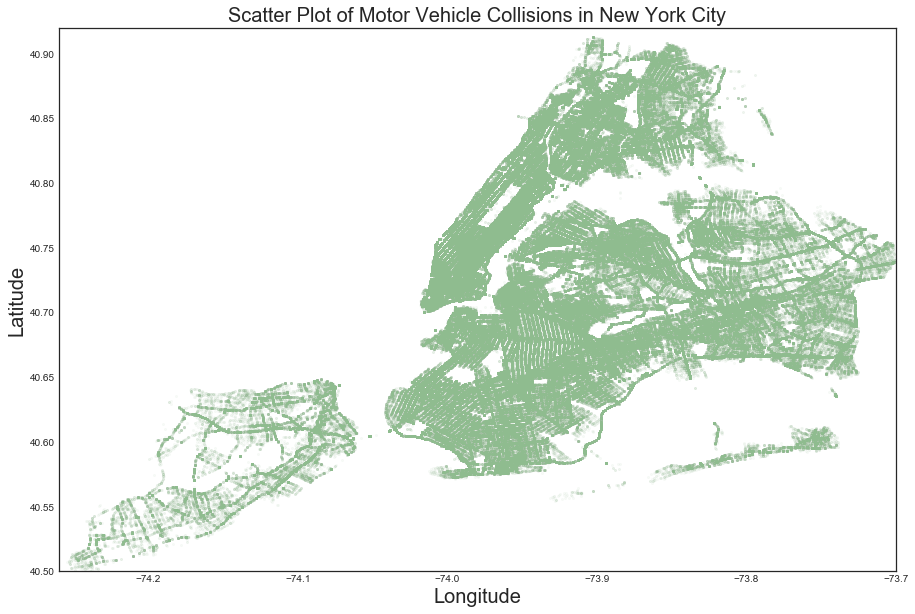

In [126]:
sns.set_style("white")
plt.figure(figsize=(15,10))

plt.scatter(lon, lat, alpha=0.05, s=4, color='darkseagreen')

plt.title('Scatter Plot of Motor Vehicle Collisions in New York City', size=20)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)

plt.show()

## Heatmap of Collisions

In [127]:
querystr = "SELECT LATITUDE,LONGITUDE,BOROUGH FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '' AND LATITUDE <> 0 AND LONGITUDE <> 0"
cur = db.cursor()
cur.execute(querystr)

715697

In [128]:
lat1 = [] 
lon1 = []
lat2 = []
lon2 = []
lat3 = []
lon3 = []
lat4 = []
lon4 = []
lat5 = []
lon5 = []
for row in cur.fetchall():
    if row[2] == 'MANHATTAN':
        lat1.append(row[0])
        lon1.append(row[1])
    elif row[2] == 'BROOKLYN':
        lat2.append(row[0])
        lon2.append(row[1])
    elif row[2] == 'BRONX':
        lat3.append(row[0])
        lon3.append(row[1])
    elif row[2] == 'QUEENS':
        lat4.append(row[0])
        lon4.append(row[1])
    else:
        lat5.append(row[0])
        lon5.append(row[1])

In [129]:
gmap = gmplot.GoogleMapPlotter.from_geocode("New York")

gmap.heatmap(lat1, lon1)
gmap.heatmap(lat2, lon2)
gmap.heatmap(lat3, lon3)
gmap.heatmap(lat4, lon4)
gmap.heatmap(lat5, lon5)

gmap.draw("map.html")


webbrowser.open('file://' + os.path.realpath("map.html"))

True

## Scatter plot of Collisions according to boroughs

In [130]:
querystr = "SELECT LATITUDE,LONGITUDE,BOROUGH FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> ''"
cur = db.cursor()
cur.execute(querystr)

lat1 = [] 
lon1 = []
lat2 = []
lon2 = []
lat3 = []
lon3 = []
lat4 = []
lon4 = []
lat5 = []
lon5 = []
for row in cur.fetchall():
    if row[2] == 'MANHATTAN':
        lat1.append(row[0])
        lon1.append(row[1])
    elif row[2] == 'BROOKLYN':
        lat2.append(row[0])
        lon2.append(row[1])
    elif row[2] == 'BRONX':
        lat3.append(row[0])
        lon3.append(row[1])
    elif row[2] == 'QUEENS':
        lat4.append(row[0])
        lon4.append(row[1])
    else:
        lat5.append(row[0])
        lon5.append(row[1])

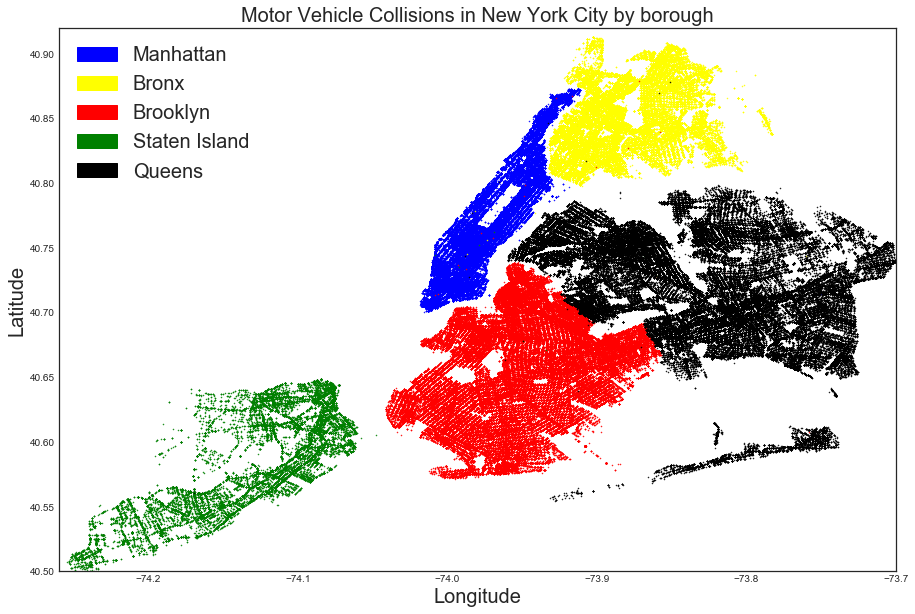

In [131]:
# 1 - Manhattan, 2-Brooklyn, 3-Bronx, 4-Queens, 5-Staten Island
plt.figure(figsize=(15,10))

plt.scatter(lon1, lat1, s=1, color='blue', marker ='.')
plt.scatter(lon3, lat3, s=1, color='yellow', marker ='.')
plt.scatter(lon2, lat2, color='red', s=1, marker ='.')
plt.scatter(lon5, lat5, s=1, color='green', marker ='.')
plt.scatter(lon4, lat4, s=1, color='black', marker ='.')

blue_patch = mpatches.Patch(label='Manhattan', color='blue')
yellow_patch = mpatches.Patch(color='yellow', label='Bronx')
red_patch = mpatches.Patch(color='red', label='Brooklyn')
green_patch = mpatches.Patch(color='green', label='Staten Island')
black_patch = mpatches.Patch(color='black', label='Queens')
plt.legend([blue_patch, yellow_patch, red_patch, green_patch, black_patch],
           ('Manhattan', 'Bronx', 'Brooklyn', 'Staten Island', 'Queens'), 
           loc='upper left', prop={'size':20})

plt.title('Motor Vehicle Collisions in New York City by borough', size=20)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.show()

## Comparison of Number of Collisions and Number of People Injured

In [143]:
querystr = "SELECT BOROUGH,count(BOROUGH) FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '' group by BOROUGH "
cur = db.cursor()
cur.execute(querystr)

borough = []
count = []
for row in cur.fetchall():
    borough.append(row[0])
    count.append(row[1])

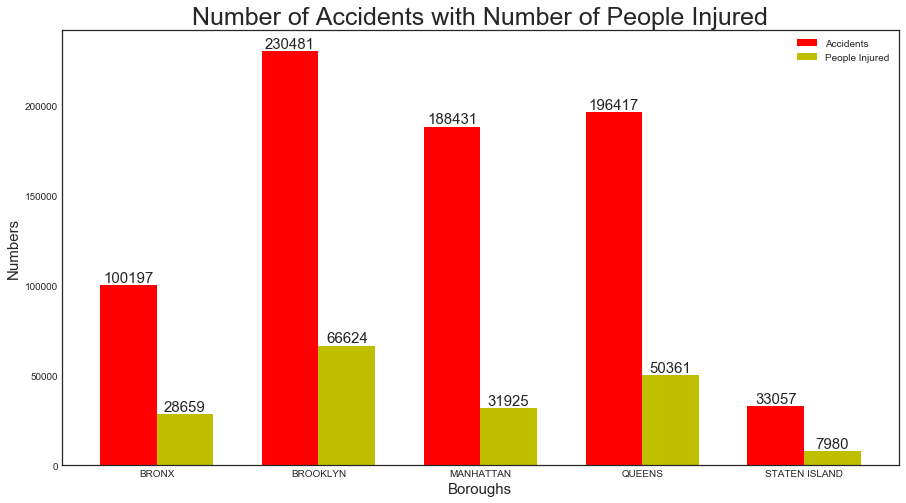

In [144]:
N = 5
width = 0.35
ind = np.arange(N)  
men_std = (2, 3, 4, 1, 2)

fig, ax = plt.subplots(figsize=(15,8))

#fig.SubplotParams.update(left=5, bottom=5, right=5, top=5, wspace=5, hspace=5)
rects1 = ax.bar(ind, count, width, color='r', yerr=men_std)


women_std = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, count_killed, width, color='y', yerr=women_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Numbers', size = 15)
ax.set_xlabel('Boroughs', size = 15)
ax.set_title('Number of Accidents with Number of People Injured',size = 25)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((borough))

ax.legend((rects1[0], rects2[0]), ('Accidents', 'People Injured'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % int(height),
                ha='center', va='bottom',size = 15)

autolabel(rects1)
autolabel(rects2)

plt.show()

## Persons killed according to Borough

In [145]:
querystr = "SELECT BOROUGH,SUM(NUMBER_OF_PERSONS_KILLED) FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '' group by BOROUGH "
cur = db.cursor()
cur.execute(querystr)

5

In [146]:
borough = []
count_killed = []
for row in cur.fetchall():
    borough.append(row[0])
    count_killed.append(row[1])

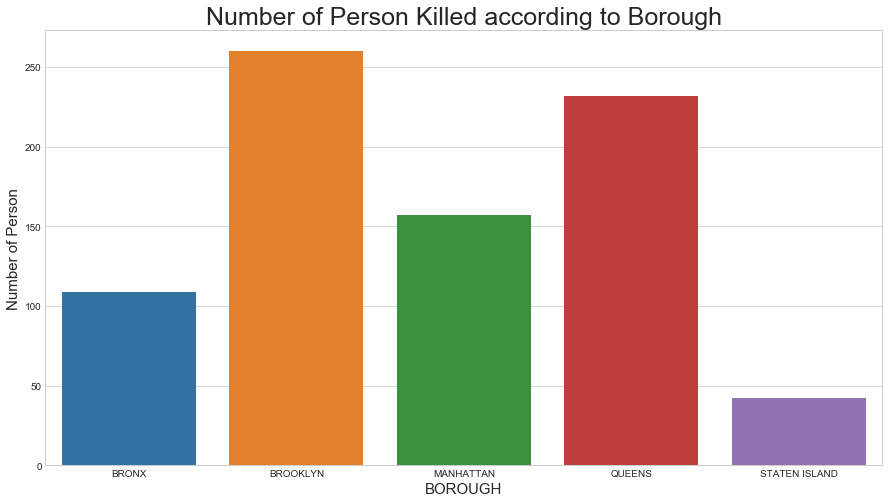

In [147]:
%matplotlib inline

sns.set_style("whitegrid")
a = [1,2,3,4,5]
fig=plt.figure(figsize=[15,8])
ax = sns.barplot(x=borough, y=count_killed)

plt.title("Number of Person Killed according to Borough", size = 25)
plt.xlabel("BOROUGH", size = 15)
plt.ylabel("Number of Person", size = 15)
plt.show()

In [136]:
# querystr = "SELECT BOROUGH,SUM(NUMBER_OF_PERSONS_INJURED) FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '' group by BOROUGH "
# cur = db.cursor()
# cur.execute(querystr)

# borough = []
# count_killed = []
# for row in cur.fetchall():
#     borough.append(row[0])
#     count_killed.append(row[1])

# %matplotlib inline

# a = [1,2,3,4,5]
# fig=plt.figure(figsize=[15,8])
# plt.bar(a, count_killed, align='center')
# plt.xticks(a, borough)
# plt.title('Number of persons injured according to Borough', size = 25)
# plt.show()

## Basemap of Number of People Injured and Killed

In [148]:
querystr = "SELECT LATITUDE,LONGITUDE,BOROUGH,NUMBER_OF_PERSONS_KILLED FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '' and NUMBER_OF_PERSONS_KILLED <> 0"
cur = db.cursor()
cur.execute(querystr)

lat11 = [] 
lon11 = []
lat22 = []
lon22 = []
lat33 = []
lon33 = []
lat44 = []
lon44 = []
lat55 = []
lon55 = []
for row in cur.fetchall():
    if row[2] == 'MANHATTAN':
        lat11.append(row[0])
        lon11.append(row[1])
    elif row[2] == 'BROOKLYN':
        lat22.append(row[0])
        lon22.append(row[1])
    elif row[2] == 'BRONX':
        lat33.append(row[0])
        lon33.append(row[1])
    elif row[2] == 'QUEENS':
        lat44.append(row[0])
        lon44.append(row[1])
    else:
        lat55.append(row[0])
        lon55.append(row[1])

In [149]:
querystr = "SELECT LATITUDE,LONGITUDE,BOROUGH FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '' and NUMBER_OF_PERSONS_INJURED <> 0"
cur = db.cursor()
cur.execute(querystr)

lat1_1 = [] 
lon1_1 = []
lat2_2 = []
lon2_2 = []
lat3_3 = []
lon3_3 = []
lat4_4 = []
lon4_4 = []
lat5_5 = []
lon5_5 = []
for row in cur.fetchall():
    if row[2] == 'MANHATTAN':
        lat1_1.append(row[0])
        lon1_1.append(row[1])
    elif row[2] == 'BROOKLYN':
        lat2_2.append(row[0])
        lon2_2.append(row[1])
    elif row[2] == 'BRONX':
        lat3_3.append(row[0])
        lon3_3.append(row[1])
    elif row[2] == 'QUEENS':
        lat4_4.append(row[0])
        lon4_4.append(row[1])
    else:
        lat5_5.append(row[0])
        lon5_5.append(row[1])

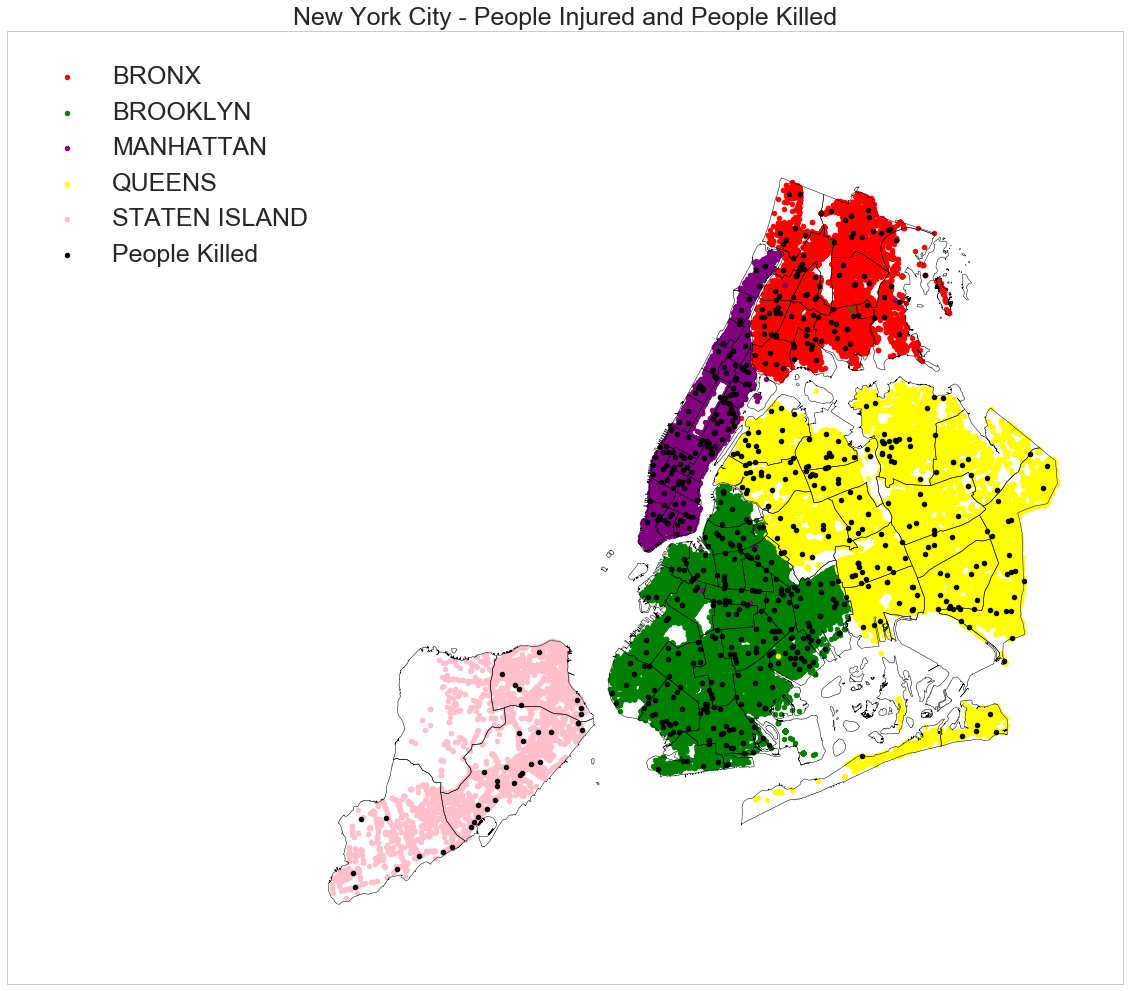

In [150]:
labels = ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']
person_killed = {}
accidents = {}
person_injured = {}
for borough in labels:
    if borough == 'MANHATTAN':
        person_killed[borough] = [lat11, lon11]
        person_injured[borough] = [lat1_1,lon1_1]
    elif borough == 'BROOKLYN':
        person_killed[borough] = [lat22,lon22]
        person_injured[borough] = lat2_2,lon2_2
    elif borough == 'BRONX':
        person_killed[borough] = [lat33,lon33]
        person_injured[borough] = [lat3_3,lon3_3]
    elif borough == 'QUEENS':
        person_killed[borough] = [lat44,lon44]
        person_injured[borough] = [lat4_4,lon4_4]
    else:
        person_killed[borough] = [lat55,lon55]
        person_injured[borough] = [lat5_5,lon5_5]

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[20,20])
m = Basemap(projection='merc',llcrnrlat=40.45,urcrnrlat=41.00,\
        llcrnrlon=-74.50,urcrnrlon=-73.650,lat_ts=20,resolution='c')
m.readshapefile('./geo_export_52a6145a-a055-49fb-ac35-560dd2c5f3e0','new york')

color = ['#F1948A','#85C1E9','#82E0AA','#F9E79F','#EDBB99']
colors = ['red','green','purple','yellow','pink']
i = 0

for key, value in person_injured.items():
    x,y = m(value[1],value[0])
    plt.scatter(x,y,c=colors[i],marker ='o',s=20, label = key)
    i = i + 1

for key, value in person_killed.items():
    x,y = m(value[1],value[0])
    if key == 'STATEN ISLAND':
        a = plt.scatter(x,y,c='#000000',marker ='o',s=20, label = 'People Killed')
    else:
        a = plt.scatter(x,y,c='#000000',marker ='o',s=20)

plt.legend(loc=2, borderaxespad=1.,shadow=True, fancybox=True, fontsize = 25)
plt.title("New York City - People Injured and People Killed", size = 25)
plt.show()

## Vehicle Type Responsible for Collisions

In [151]:
# Category of Vehicle responsible for maximum Collisions
querystr = '''select count(*) as count, VEHICLE_TYPE_CODE_1 from ACCIDENT_DATA 
where VEHICLE_TYPE_CODE_1 <> "" AND VEHICLE_TYPE_CODE_1 <> "Unspecified" 
group by VEHICLE_TYPE_CODE_1 
order by count DESC 
LIMIT 5;'''
cur = db.cursor()
cur.execute(querystr)

vehicle_type = []
count = []
for row in cur.fetchall():
    vehicle_type.append(row[1])
    count.append(row[0])


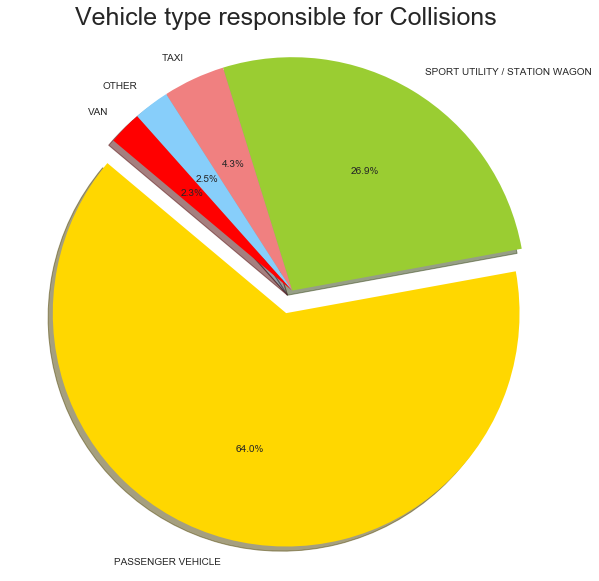

In [152]:
labels = ['PASSENGER VEHICLE', 'SPORT UTILITY / STATION WAGON', 'TAXI', 'OTHER', 'VAN']
sizes = count
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']
explode = (0.1, 0, 0, 0,0)  # explode 1st slice
fig=plt.figure(figsize=[10,10]) 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Vehicle type responsible for Collisions',size = 25)
plt.axis('equal')
plt.show()

## Contributing factors for Vehicle Collisions

In [153]:
querystr = '''SELECT CONTRIBUTING_FACTOR_VEHICLE_1,COUNT(*) as count
FROM ACCIDENT_DATA
WHERE CONTRIBUTING_FACTOR_VEHICLE_1 IS NOT NULL and CONTRIBUTING_FACTOR_VEHICLE_1 <> "" and CONTRIBUTING_FACTOR_VEHICLE_1 <>"Unspecified"
group by CONTRIBUTING_FACTOR_VEHICLE_1 
order by count DESC LIMIT 10 ;'''
cur = db.cursor()
cur.execute(querystr)

borough = []
count_c_factor = []
for row in cur.fetchall():
    borough.append(row[0])
    count_c_factor.append(row[1])


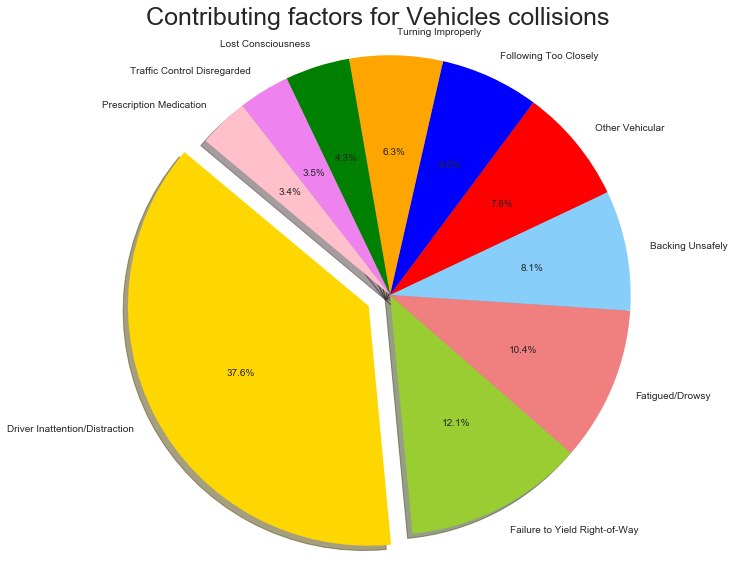

In [154]:
labels =['Driver Inattention/Distraction', 'Failure to Yield Right-of-Way', 'Fatigued/Drowsy', 'Backing Unsafely', 'Other Vehicular', 'Following Too Closely', 'Turning Improperly', 'Lost Consciousness', 'Traffic Control Disregarded', 'Prescription Medication'] 
sizes = count_c_factor
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red','blue','orange','green','violet','pink']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice
fig=plt.figure(figsize=[10,10]) 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Contributing factors for Vehicles collisions', size = 25)
plt.axis('equal')
plt.show()

## Scatter Plot on Severity of Motor Vehicle Collisions in New York City

In [155]:
querystr = '''SELECT LATITUDE, LONGITUDE FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '' and NUMBER_OF_PERSONS_KILLED <> 0; '''
querystr1 = '''SELECT LATITUDE, LONGITUDE FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '' and NUMBER_OF_PERSONS_KILLED = 0 and NUMBER_OF_PERSONS_INJURED <> 0;'''
querystr2 = '''SELECT LATITUDE, LONGITUDE FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '' and NUMBER_OF_PERSONS_KILLED = 0 and NUMBER_OF_PERSONS_INJURED = 0;'''
cur = db.cursor()
cur1 = db.cursor()
cur2 = db.cursor()
cur.execute(querystr)
cur1.execute(querystr1)
cur2.execute(querystr2)
killed_lat = []
killed_lon = []
injured_lat = []
injured_lon = []
non_lat = []
non_lon = []
for row in cur.fetchall():
    killed_lat.append(row[0])
    killed_lon.append(row[1])

for row in cur1.fetchall():
    injured_lat.append(row[0])
    injured_lon.append(row[1])
    
for row in cur2.fetchall():
    non_lat.append(row[0])
    non_lon.append(row[1])    

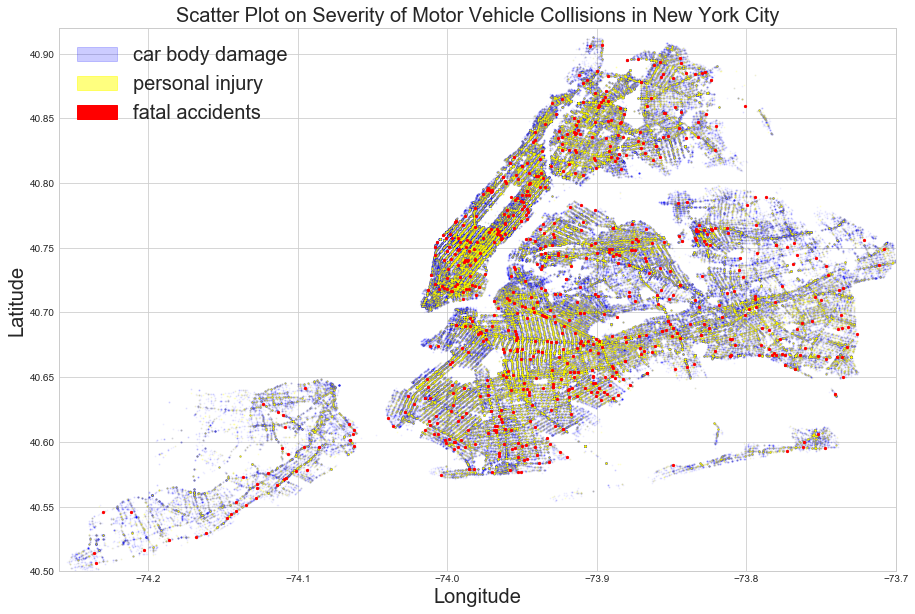

In [156]:
plt.figure(figsize=(15,10))
plt.scatter(non_lon, non_lat, alpha=0.04, s=1, color='blue')
plt.scatter(injured_lon, injured_lat, alpha=0.1, s=1, color='yellow')
plt.scatter(killed_lon, killed_lat, color='red', s=5)

blue_patch = mpatches.Patch( label='car body damage', alpha=0.2, color='blue')
yellow_patch = mpatches.Patch(color='yellow', label='personal injury', alpha=0.5)
red_patch = mpatches.Patch(color='red', label='lethal accidents')
plt.legend([blue_patch, yellow_patch, red_patch],('car body damage', 'personal injury', 'fatal accidents'), 
           loc='upper left', prop={'size':20})

plt.title('Scatter Plot on Severity of Motor Vehicle Collisions in New York City', size=20)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.show()## Obtaining Streets with most collisions 

In [50]:
# # Category of Vehicle responsible for maximum Collisions
# querystr = '''select count(*) as count, VEHICLE_TYPE_CODE_2 from ACCIDENT_DATA 
# where VEHICLE_TYPE_CODE_2 <> "" AND VEHICLE_TYPE_CODE_2 <> "Unspecified" AND VEHICLE_TYPE_CODE_1='PASSENGER VEHICLE'
# group by VEHICLE_TYPE_CODE_2 
# order by count DESC 
# LIMIT 5;'''
# cur = db.cursor()
# cur.execute(querystr)

# vehicle_type = []
# count = []
# for row in cur.fetchall():
#     vehicle_type.append(row[1])
#     count.append(row[0])


In [53]:
# %matplotlib inline

# a = [1,2,3,4,5]
# fig=plt.figure(figsize=[16,6])
# # b = df.value_counts()
# plt.bar(a, count, align='center')
# plt.xticks(a, vehicle_type)
# plt.title('Vehicle Responsible for collisions')
# plt.show()

In [54]:
# labels = ['PASSENGER VEHICLE', 'SPORT UTILITY / STATION WAGON', 'TAXI', 'OTHER', 'VAN']
# sizes = count
# colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']
# explode = (0.1, 0, 0, 0,0)  # explode 1st slice
# fig=plt.figure(figsize=[10,10]) 
# # Plot
# plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#         autopct='%1.1f%%', shadow=True, startangle=140)
 
# plt.axis('equal')
# plt.show()

## Dangerous Streets with most collisions 

In [158]:
# Category of Vehicle responsible for maximum Collisions
querystr = '''select count(*) as count, ON_STREET_NAME from ACCIDENT_DATA
where ON_STREET_NAME IS NOT NULL AND ON_STREET_NAME<>" "
group by ON_STREET_NAME 
order by count desc limit 10;
'''
cur = db.cursor()
cur.execute(querystr)

vehicle_type = []
count = []
for row in cur.fetchall():
    vehicle_type.append(row[1])
    count.append(row[0])

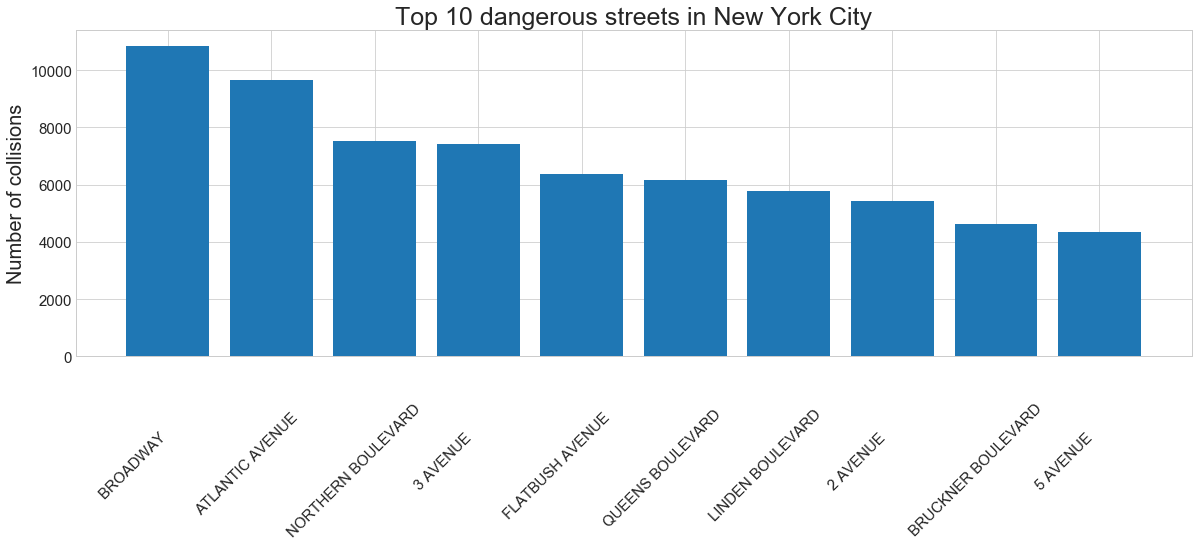

In [159]:
%matplotlib inline

a = [1,2,3,4,5,6,7,8,9,10]
fig=plt.figure(figsize=[20,6])
# b = df.value_counts()
plt.bar(a, count, align='center')
plt.xticks(a, vehicle_type, rotation = 45,size = 15)
plt.yticks(size = 15)
plt.title('Top 10 dangerous streets in New York City',size = 25)
#plt.xlabel('Street',size = 15)
plt.ylabel('Number of collisions',size = 20)
plt.show()

In [160]:
querystr = '''select ON_STREET_NAME,LATITUDE, LONGITUDE from ACCIDENT_DATA 
where ((ON_STREET_NAME = "BROADWAY" AND BOROUGH = "MANHATTAN") or (ON_STREET_NAME = "ATLANTIC AVENUE" AND BOROUGH = "BROOKLYN") 
or (ON_STREET_NAME = "NORTHERN BOULEVARD" AND BOROUGH = "QUEENS") or (ON_STREET_NAME = "3 AVENUE" AND BOROUGH = "MANHATTAN") 
or (ON_STREET_NAME = "3 AVENUE" AND BOROUGH = "BRONX") or (ON_STREET_NAME = "FLATBUSH AVENUE" AND BOROUGH = "BROOKLYN") 
or (ON_STREET_NAME = "QUEENS BOULEVARD" AND BOROUGH = "QUEENS") or (ON_STREET_NAME = "LINDEN BOULEVARD") 
or (ON_STREET_NAME = "2 AVENUE" AND BOROUGH = "MANHATTAN") or (ON_STREET_NAME = "BRUCKNER BOULEVARD" AND BOROUGH = "BRONX") 
or (ON_STREET_NAME = "5 AVENUE" AND BOROUGH = "MANHATTAN")) AND LATITUDE <> 0 AND LONGITUDE <> 0;'''
cur = db.cursor()
cur.execute(querystr)
lat1 = [] 
lon1 = []
lat2 = []
lon2 = []
lat3 = []
lon3 = []
lat4 = []
lon4 = []
lat5 = []
lon5 = []
lat6 = [] 
lon6 = []
lat7 = []
lon7 = []
lat8 = []
lon8 = []
lat9 = []
lon9 = []
lat10 = []
lon10 = []
for row in cur.fetchall():
    if row[0].strip() == 'BROADWAY':
        lat1.append(row[1])
        lon1.append(row[2])
    elif row[0].strip() == 'ATLANTIC AVENUE':
        lat2.append(row[1])
        lon2.append(row[2])
    elif row[0].strip() == 'NORTHERN BOULEVARD':
        lat3.append(row[1])
        lon3.append(row[2])
    elif row[0].strip() == '3 AVENUE':
        lat4.append(row[1])
        lon4.append(row[2])
    elif row[0].strip() == 'FLATBUSH AVENUE':
        lat5.append(row[1])
        lon5.append(row[2])
    elif row[0].strip() == 'QUEENS BOULEVARD':
        lat6.append(row[1])
        lon6.append(row[2])
    elif row[0].strip() == 'LINDEN BOULEVARD':
        lat7.append(row[1])
        lon7.append(row[2])
    elif row[0].strip() == '2 AVENUE':
        lat8.append(row[1])
        lon8.append(row[2])
    elif row[0].strip() == 'BRUCKNER BOULEVARD':
        lat9.append(row[1])
        lon9.append(row[2])
    elif row[0].strip() == '5 AVENUE':
        lat10.append(row[1])
        lon10.append(row[2])## Obtaining Streets with most collisions 

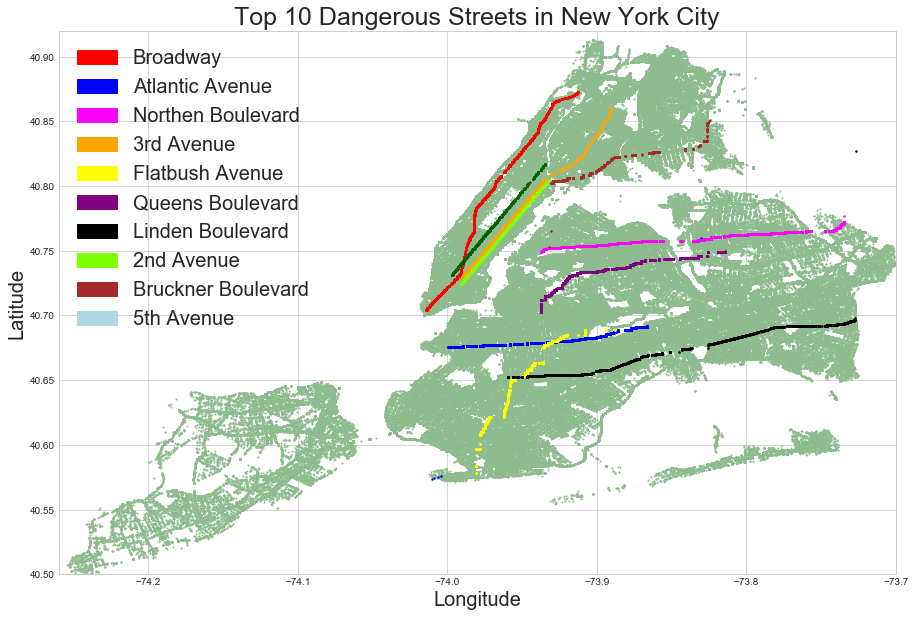

In [165]:
plt.figure(figsize=(15,10))

plt.scatter(lon, lat, s=1, color='darkseagreen')
plt.scatter(lon1, lat1, s=2, color='red')
plt.scatter(lon2, lat2, color='blue', s=2)
plt.scatter(lon3, lat3, s=2, color='magenta')
plt.scatter(lon4, lat4, color='orange', s=2)
plt.scatter(lon5, lat5, s=2, color='yellow')
plt.scatter(lon6, lat6, color='purple', s=2)
plt.scatter(lon7, lat7, s=2, color='black')
plt.scatter(lon8, lat8, color='chartreuse', s=2)
plt.scatter(lon9, lat9, s=2, color='brown')
plt.scatter(lon10, lat10, color='darkgreen', s=2)


a_patch = mpatches.Patch(color='red', label='Broadway')
b_patch = mpatches.Patch(color='blue', label='Atlantic Avenue')
c_patch = mpatches.Patch(color='magenta', label='Northen Boulevard')
d_patch = mpatches.Patch(color='orange', label='3rd Avenue')
e_patch = mpatches.Patch(color='yellow', label='Flatbush Avenue')
f_patch = mpatches.Patch(color='purple', label='Queens Boulevard')
g_patch = mpatches.Patch(color='black', label='Linden Boulevard')
h_patch = mpatches.Patch(color='chartreuse', label='2nd Avenue')
i_patch = mpatches.Patch(color='brown', label='Bruckner Boulevard')
j_patch = mpatches.Patch(color='lightblue', label='5th Avenue')


plt.legend([a_patch, b_patch, c_patch, d_patch, e_patch, f_patch, g_patch, h_patch, i_patch, j_patch],
           ('Broadway', 'Atlantic Avenue', 'Northen Boulevard', '3rd Avenue', 'Flatbush Avenue', 'Queens Boulevard',
            'Linden Boulevard', '2nd Avenue', 'Bruckner Boulevard', '5th Avenue'), 
           loc='upper left', prop={'size':20})

plt.title('Top 10 Dangerous Streets in New York City', size=25)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.show()

## Dangerous Streets in Map

In [163]:
import folium
from folium import plugins
m = folium.Map([40.7128, -74.0060], zoom_start=11)

lat1.sort()
lon1.sort()
lat2.sort()
lon2.sort()
lat3.sort()
lon3.sort()
lat4.sort()
lon4.sort()
lat5.sort()
lon5.sort()
lat6.sort()
lon6.sort()
lat7.sort()
lon7.sort()
lat8.sort()
lon8.sort()
lat9.sort()
lon9.sort()
lat10.sort()
lon10.sort()
len7 = int(len(lat1)/10)

line1 = folium.PolyLine(
    [[lat1[len7],lon1[len7]],[lat1[2*len7],lon1[2*len7]],[lat1[3*len7],lon1[3*len7]],[lat1[4*len7],lon1[4*len7]],
    [lat1[5*len7],lon1[5*len7]],[lat1[6*len7],lon1[6*len7]],[lat1[7*len7],lon1[7*len7]],[lat1[8*len7],lon1[8*len7]],
    [lat1[9*len7],lon1[9*len7]]],
    color='red'
).add_to(m)

plugins.PolyLineTextPath(
    line1,
    '\u25BA',
    repeat=True,
    offset=6,
    attributes={'fill': 'red'}
).add_to(m)

len7 = int(len(lat2)/10)

line2 = folium.PolyLine(
    [[lat2[len7],lon2[len7]],[lat2[2*len7],lon2[2*len7]],[lat2[3*len7],lon2[3*len7]],[lat2[4*len7],lon2[4*len7]],
    [lat2[5*len7],lon2[5*len7]],[lat2[6*len7],lon2[6*len7]],[lat2[7*len7],lon2[7*len7]],[lat2[8*len7],lon2[8*len7]],
    [lat2[9*len7],lon2[9*len7]]],
    color='blue'
).add_to(m)

plugins.PolyLineTextPath(
    line2,
    '\u25BA',
    repeat=True,
    offset=6,
    attributes={'fill': 'blue'}
).add_to(m)

len7 = int(len(lat3)/10)

line3 = folium.PolyLine(
    [[lat3[len7],lon3[len7]],[lat3[2*len7],lon3[2*len7]],[lat3[3*len7],lon3[3*len7]],[lat3[4*len7],lon3[4*len7]],
    [lat3[5*len7],lon3[5*len7]],[lat3[6*len7],lon3[6*len7]],[lat3[7*len7],lon3[7*len7]],[lat3[8*len7],lon3[8*len7]],
    [lat3[9*len7],lon3[9*len7]]],
    color='magenta'
).add_to(m)

plugins.PolyLineTextPath(
    line3,
    '\u25BA',
    repeat=True,
    offset=6,
    attributes={'fill': 'magenta'}
).add_to(m)

len7 = int(len(lat4)/10)

line4 = folium.PolyLine(
    [[lat4[len7],lon4[len7]],[lat4[2*len7],lon4[2*len7]],[lat4[3*len7],lon4[3*len7]],[lat4[4*len7],lon4[4*len7]],
    [lat4[5*len7],lon4[5*len7]],[lat4[6*len7],lon4[6*len7]],[lat4[7*len7],lon4[7*len7]],[lat4[8*len7],lon4[8*len7]],
    [lat4[9*len7],lon4[9*len7]]],
    color='orange'
).add_to(m)

plugins.PolyLineTextPath(
    line4,
    '\u25BA',
    repeat=True,
    offset=6,
    attributes={'fill': 'orange'}
).add_to(m)

len7 = int(len(lat5)/10)

line5 = folium.PolyLine(
    [[lat5[len7],lon5[len7]],[lat5[2*len7],lon5[2*len7]],[lat5[3*len7],lon5[3*len7]],[lat5[4*len7],lon5[4*len7]],
    [lat5[5*len7],lon5[5*len7]],[lat5[6*len7],lon5[6*len7]],[lat5[7*len7],lon5[7*len7]],[lat5[8*len7],lon5[8*len7]],
    [lat5[9*len7],lon5[9*len7]]],
    color='yellow'
).add_to(m)

plugins.PolyLineTextPath(
    line5,
    '\u25BA',
    repeat=True,
    offset=6,
    attributes={'fill': 'yellow'}
).add_to(m)

len7 = int(len(lat6)/10)

line6 = folium.PolyLine(
    [[lat6[len7],lon6[len7]],[lat6[2*len7],lon6[2*len7]],[lat6[3*len7],lon6[3*len7]],[lat6[4*len7],lon6[4*len7]],
    [lat6[5*len7],lon6[5*len7]],[lat6[6*len7],lon6[6*len7]],[lat6[7*len7],lon6[7*len7]],[lat6[8*len7],lon6[8*len7]],
    [lat6[9*len7],lon6[9*len7]]],
    color='purple'
).add_to(m)

plugins.PolyLineTextPath(
    line6,
    '\u25BA',
    repeat=True,
    offset=6,
    attributes={'fill': 'purple'}
).add_to(m)

len7 = int(len(lat7)/10)

line7 = folium.PolyLine(
    [[lat7[len7],lon7[len7]],[lat7[2*len7],lon7[2*len7]],[lat7[3*len7],lon7[3*len7]],[lat7[4*len7],lon7[4*len7]],
    [lat7[5*len7],lon7[5*len7]],[lat7[6*len7],lon7[6*len7]],[lat7[7*len7],lon7[7*len7]],[lat7[8*len7],lon7[8*len7]],
    [lat7[9*len7],lon7[9*len7]]],
    color='black'
).add_to(m)

plugins.PolyLineTextPath(
    line7,
    '\u25BA',
    repeat=True,
    offset=6,
    attributes={'fill': 'black'}
).add_to(m)

len7 = int(len(lat8)/10)

line8 = folium.PolyLine(
    [[lat8[len7],lon8[len7]],[lat8[2*len7],lon8[2*len7]],[lat8[3*len7],lon8[3*len7]],[lat8[4*len7],lon8[4*len7]],
    [lat8[5*len7],lon8[5*len7]],[lat8[6*len7],lon8[6*len7]],[lat8[7*len7],lon8[7*len7]],[lat8[8*len7],lon8[8*len7]],
    [lat8[9*len7],lon8[9*len7]]],
    color='chartreuse'
).add_to(m)

plugins.PolyLineTextPath(
    line8,
    '\u25BA',
    repeat=True,
    offset=6,
    attributes={'fill': 'chartreuse'}
).add_to(m)

len7 = int(len(lat9)/10)

line9 = folium.PolyLine(
    [[lat9[len7],lon9[len7]],[lat9[2*len7],lon9[2*len7]],[lat9[3*len7],lon9[3*len7]],[lat9[4*len7],lon9[4*len7]],
    [lat9[5*len7],lon9[5*len7]],[lat9[6*len7],lon9[6*len7]],[lat9[7*len7],lon9[7*len7]],[lat9[8*len7],lon9[8*len7]],
    [lat9[9*len7],lon9[9*len7]]],
    color='brown'
).add_to(m)


plugins.PolyLineTextPath(
    line9,
    '\u25BA',
    repeat=True,
    offset=6,
    attributes={'fill': 'brown'}
).add_to(m)

len7 = int(len(lat10)/10)

line10 = folium.PolyLine(
    [[lat10[len7],lon10[len7]],[lat10[2*len7],lon10[2*len7]],[lat10[3*len7],lon10[3*len7]],[lat10[4*len7],lon10[4*len7]],
    [lat10[5*len7],lon10[5*len7]],[lat10[6*len7],lon10[6*len7]],[lat10[7*len7],lon10[7*len7]],[lat10[8*len7],lon10[8*len7]],
    [lat10[9*len7],lon10[9*len7]]],
    color='lightgreen'
).add_to(m)


plugins.PolyLineTextPath(
    line10,
    '\u25BA',
    repeat=True,
    offset=6,
    attributes={'fill': 'lightgreen'}
).add_to(m)

m

## Collisions on Road per Hour

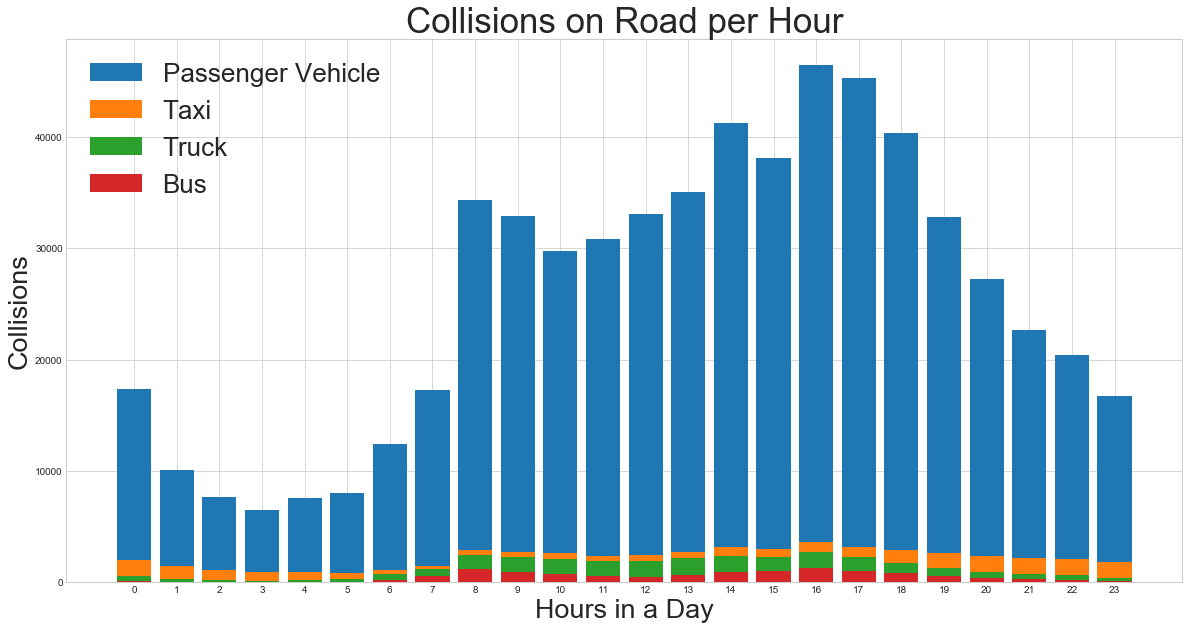

In [166]:
querystr = '''select count(*) as count, hour(time), VEHICLE_TYPE_CODE_1 from ACCIDENT_DATA
where time IS NOT NULL AND time<>" " and VEHICLE_TYPE_CODE_1 = "BUS" or VEHICLE_TYPE_CODE_1 = "TAXI" or VEHICLE_TYPE_CODE_1 = "PASSENGER VEHICLE" or VEHICLE_TYPE_CODE_1 LIKE "%TRUCK"
group by hour(time), VEHICLE_TYPE_CODE_1
order by hour(time) asc;
'''
cur = db.cursor()
cur.execute(querystr)

querystr1 = '''select count(*) as count, hour(time), VEHICLE_TYPE_CODE_1 from ACCIDENT_DATA
where time IS NOT NULL AND time<>" " and VEHICLE_TYPE_CODE_1 LIKE "%TRUCK"
group by hour(time), VEHICLE_TYPE_CODE_1
order by hour(time) asc;'''
cur1 = db.cursor()
cur1.execute(querystr1)

truck = [0]*24
for row in cur1.fetchall():
    truck[row[1]] += row[0]

    

bus = []
vehicle = []
taxi = []
for row in cur.fetchall():
    cnt = 0
    if row[2] == "BUS":
        bus.append(row[0])
    elif row[2] == "PASSENGER VEHICLE":
        vehicle.append(row[0])
    elif row[2] == "TAXI":
        taxi.append(row[0])


X = list(range(24))
fig=plt.figure(figsize=[20,10])
p4 = plt.bar(X, vehicle, bottom = bus)
p1 = plt.bar(X, taxi, bottom = bus)
p2 = plt.bar(X, truck, bottom = bus)
p3 = plt.bar(X, bus)
plt.legend((p4[0],p1[0],p2[0],p3[0]), ("Passenger Vehicle","Taxi","Truck","Bus"),prop={'size': 26}, loc="best")
# plt.legend((p1[0],p2[0],p3[0]), ("Taxi","Truck","Bus"),prop={'size': 26}, loc="best")
plt.xlabel("Hours in a Day", size=27)
plt.ylabel("Collisions", size=27)
plt.title('Collisions on Road per Hour', size=35)
plt.xticks(X)
plt.show()

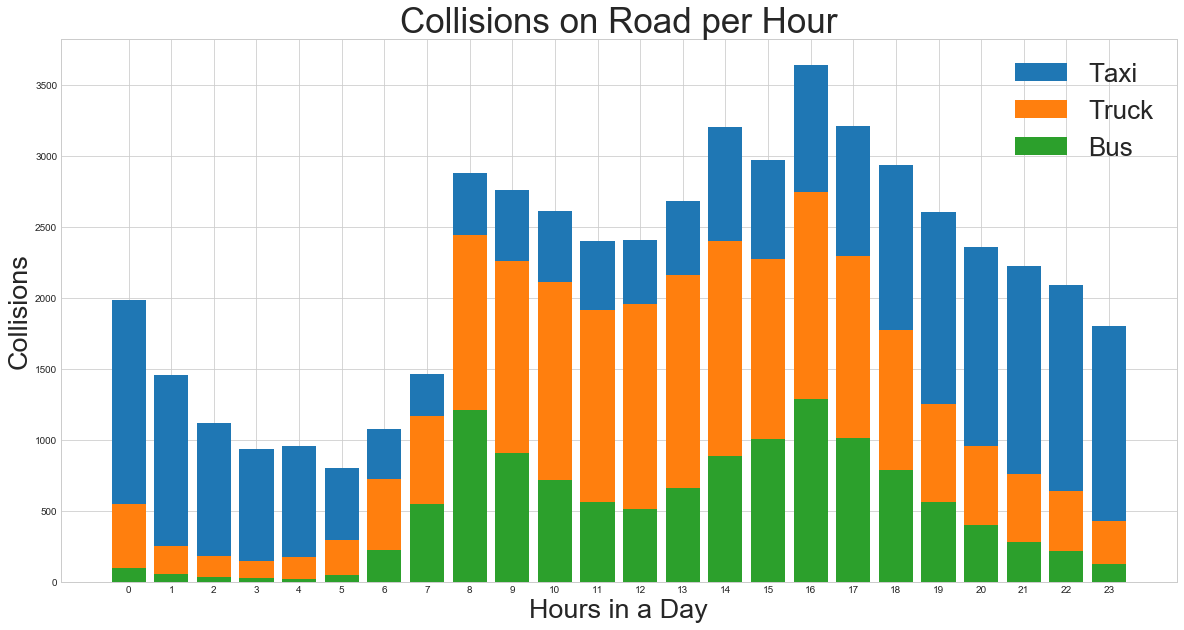

In [74]:
querystr = '''select count(*) as count, hour(time), VEHICLE_TYPE_CODE_1 from ACCIDENT_DATA
where time IS NOT NULL AND time<>" " and VEHICLE_TYPE_CODE_1 = "BUS" or VEHICLE_TYPE_CODE_1 = "TAXI" or VEHICLE_TYPE_CODE_1 = "PASSENGER VEHICLE" or VEHICLE_TYPE_CODE_1 LIKE "%TRUCK"
group by hour(time), VEHICLE_TYPE_CODE_1
order by hour(time) asc;
'''
cur = db.cursor()
cur.execute(querystr)

querystr1 = '''select count(*) as count, hour(time), VEHICLE_TYPE_CODE_1 from ACCIDENT_DATA
where time IS NOT NULL AND time<>" " and VEHICLE_TYPE_CODE_1 LIKE "%TRUCK"
group by hour(time), VEHICLE_TYPE_CODE_1
order by hour(time) asc;'''
cur1 = db.cursor()
cur1.execute(querystr1)

truck = [0]*24
for row in cur1.fetchall():
    truck[row[1]] += row[0]

    

bus = []
vehicle = []
taxi = []
for row in cur.fetchall():
    cnt = 0
    if row[2] == "BUS":
        bus.append(row[0])
    elif row[2] == "PASSENGER VEHICLE":
        vehicle.append(row[0])
    elif row[2] == "TAXI":
        taxi.append(row[0])


X = list(range(24))
fig=plt.figure(figsize=[20,10])
# p4 = plt.bar(X, vehicle, bottom = bus)
p1 = plt.bar(X, taxi, bottom = bus)
p2 = plt.bar(X, truck, bottom = bus)
p3 = plt.bar(X, bus)
# plt.legend((p4[0],p1[0],p2[0],p3[0]), ("Passenger Vehicle","Taxi","Truck","Bus"),prop={'size': 26}, loc="best")
plt.legend((p1[0],p2[0],p3[0]), ("Taxi","Truck","Bus"),prop={'size': 26}, loc="best")
plt.xlabel("Hours in a Day", size=27)
plt.ylabel("Collisions", size=27)
plt.title('Collisions on Road per Hour', size=35)
plt.xticks(X)
plt.show()

## Time Series plot for Collisions on daily basis

In [167]:
querystr = '''select count(*) as count, hour(time), dayname(dates) as days from ACCIDENT_DATA
where time IS NOT NULL AND time<>" "
group by hour(time), dayname(dates)
order by hour(time) asc;'''
cur = db.cursor()
cur.execute(querystr)

168

In [168]:
mon = []
tue = []
wed = []
thur = []
fri = []
sat = []
sun = []
for row in cur.fetchall():
    if row[-1] == "Monday":
        mon.append(row[0])
    elif row[-1] == "Tuesday":
        tue.append(row[0])
    elif row[-1] == "Wednesday":
        wed.append(row[0])
    elif row[-1] == "Thursday":
        thur.append(row[0])
    elif row[-1] == "Friday":
        fri.append(row[0])
    elif row[-1] == "Saturday":
        sat.append(row[0])
    elif row[-1] == "Sunday":
        sun.append(row[0])

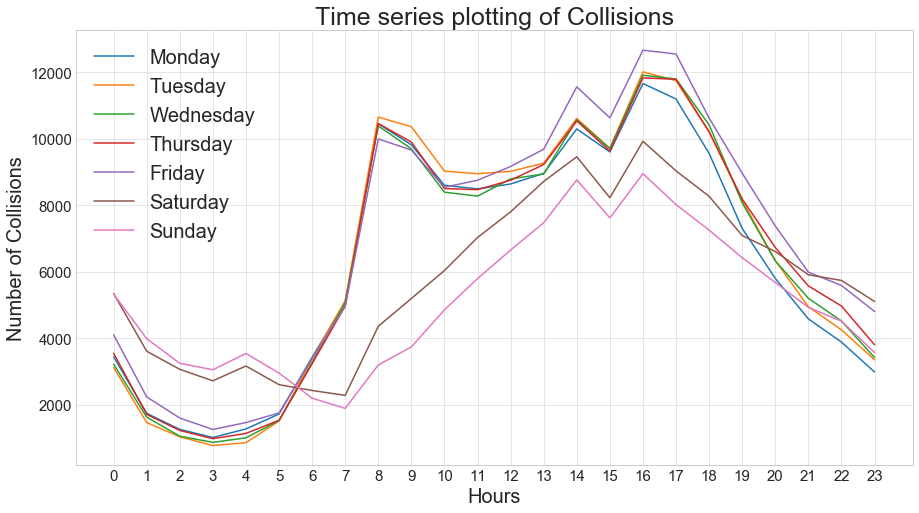

In [169]:
a = list(range(24))
# a = [0,3,6,9,12,15,18,21,23]
fig=plt.figure(figsize=[15,8])
plt.plot(a, mon, label = "Monday")
plt.plot(a, tue, label = "Tuesday")
plt.plot(a, wed, label = "Wednesday")
plt.plot(a, thur, label = "Thursday")
plt.plot(a, fri, label = "Friday")
plt.plot(a, sat, label = "Saturday")
plt.plot(a, sun, label = "Sunday")
plt.xlabel('Hours', size = 20)
plt.ylabel('Number of Collisions', size = 20)
plt.xticks(a, size = 15)
plt.yticks(size = 15)
plt.grid(linestyle='-', linewidth=0.5)
plt.title('Time series plotting of Collisions', size = 25)
plt.legend(prop={'size': 20})
plt.show()

In [170]:
# Category of Vehicle responsible for maximum Collisions
querystr = '''select count(*) as count, hour(time) from ACCIDENT_DATA
where time IS NOT NULL AND time<>" "
group by hour(time) 
order by hour(time) asc;
'''
cur = db.cursor()
cur.execute(querystr)

hour = []
count = []
for row in cur.fetchall():
    hour.append(row[1])
    count.append(row[0])

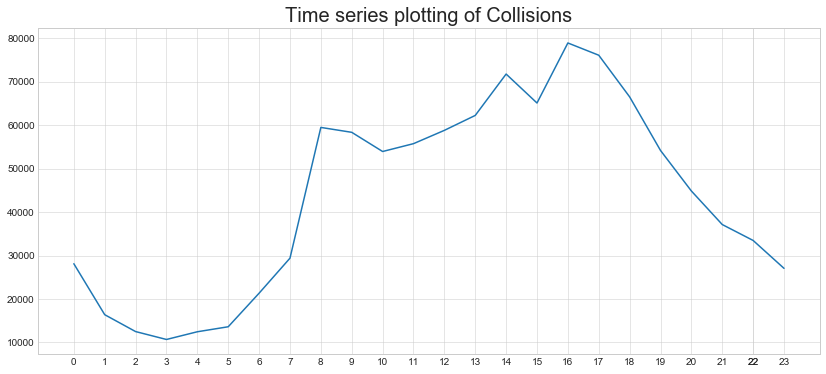

In [171]:
a = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,22,23]
fig=plt.figure(figsize=[14,6])
plt.plot(hour, count)
plt.xticks(a)
plt.grid(linestyle='-', linewidth=0.5)
plt.title('Time series plotting of Collisions', size = 20)
plt.show()

In [172]:
querystr = '''select sum(HOURLY_PRECIP) as s,hour(date) from WEATHER_DATA group by hour(date) order by hour(date) asc;'''
cur = db.cursor()
cur.execute(querystr)

hour_w = []
count_w = []
for row in cur.fetchall():
    hour_w.append(row[1])
    count_w.append(row[0])

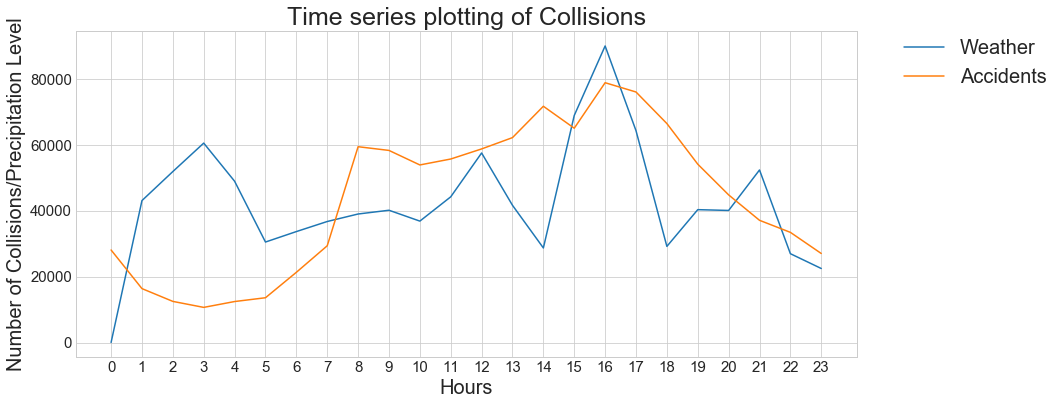

In [173]:
a = list(range(24))
fig=plt.figure(figsize=[14,6])
for i in range(1,len(count_w)):
    count_w[i] = count_w[i]*2000
plt.plot(hour_w, count_w, label = 'Weather')
plt.plot(hour,count, label = 'Accidents')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 20})
plt.xticks(a, size = 15)
plt.yticks(size = 15)
plt.xlabel('Hours', size = 20)
plt.ylabel('Number of Collisions/Precipitation Level', size = 20)
plt.title('Time series plotting of Collisions', size = 25)
plt.show()

In [178]:
querystr = '''select latitude,longitude,sum(number_of_persons_killed) as np,count(*) as count from ACCIDENT_DATA where latitude <> 0 and longitude <> 0 group by latitude,longitude order by np desc limit 5;'''
cur = db.cursor()
cur.execute(querystr)

lat = []
lon = []
sums = []
col = []
for row in cur.fetchall():
    lat.append(row[0])
    lon.append(row[1])
    sums.append(row[2])
    col.append(row[3])

In [182]:
map_2 = folium.Map([40.7128, -74.0060], zoom_start=11)

for i in range(len(lat)):
    folium.Marker([lat[i],lon[i]],popup = "People Killed : " + str(sums[i]) + " And # Of Collisions : " + str(col[i])).add_to(map_2)

map_2